#### 一、排序的概念

- <b>排序(Permutation)</b>：从n个不同的元素中取出m（1 <= m <= n）个不同的元素，按照一定的顺序排成一列的过程。
- <b>全排序(All Permutation)</b>：当m = n 时，这种排列叫做全排列。
- <b>重复排序(Permutation with Repetition)</b>：选择出的m个元素可以有重复，否则就是<b>不重复排序(Permutation without Repitition)</b>

排列是一种树状结构，其可能全排列的数量和叶子数量一致：  

- 对于n个元素的全排列，所有可能的排列数量就是n!
- 对于取出m（1 <= m <= n）个元素的不重复排列数量是A(m,n)=n!/(n-m)!。可用数学归纳法证明。
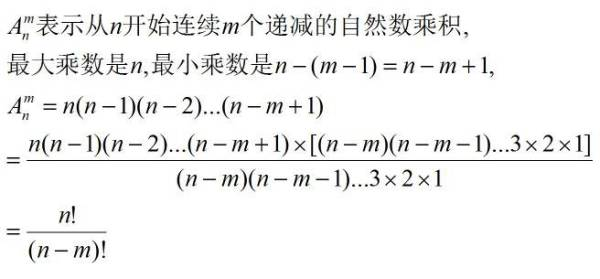

### 二、如何让计算机为田忌安排赛马？

#### 思路：  
<b>首先</b>，在不同的选马阶段，我们都有保存已经有几匹马出战，它们的排列顺序、以及还剩几匹马没有选择。使用变量result来存储当前函数操作之前已经出战的马匹以及顺序，变量horses存储当前函数操作之前剩余马匹。变量new_result和res_horses分别从rensult和horses克隆而来，保证不会影响上一次的结果。  
<b>其次</b>，孙膑的方法之所以有效，是因为田忌的马只比齐王差一点，如果差太多，可能就有不同结果，所有，设置马跑完全程的时间顺序：q1<t1<q2<t2<q3<t3，只有这样才能获得相同结果。  
<b>另外</b>，创建一个compare函数，用于判断哪方获胜。

In [31]:
class Lesson7_1:

    #设置齐王的马跑完所需时间
    q_horses_time = {
        "q1":1.0,
        "q2":2.0,
        "q3":3.0
    }

    #设置田忌的马跑完所需时间
    t_horses_time = {
        "t1":1.5,
        "t2":2.5,
        "t3":3.5
    }
    
    q_horses = ["q1", "q2", "q3"]

    
    def permutate(self, horses, result):
        """
        @Description:使用函数的递归（嵌套）调用，找出所有可能的马匹出战顺序
        @param horses-目前还剩多少马没有出战，result-保存当前已经出战的马匹及顺序
        @return void
        """
        #所有马匹都已经出战，判断哪方获胜，输出结果
        if not horses :
            print(result)
            self.compare(result, self.q_horses)
        
        for i in range(len(horses)):
            #从剩下的未出战马匹中，选择一匹，加入结果
            new_result = result.copy()
            new_result.append(horses[i])

            #将已选择的马匹从未出战的列表中移出
            rest_horses = horses.copy()
            rest_horses.remove(rest_horses[i])

            #递归调用，对于剩余的马匹继续生成排列
            self.permutate(rest_horses, new_result)
            
    def compare(self, t, q):
        t_won_cnt = 0
        for i in range(len(t)):
            print(self.t_horses_time[t[i]] , " " ,  self.q_horses_time[q[i]])
            if (self.t_horses_time[t[i]]) < self.q_horses_time[q[i]]:
                t_won_cnt += 1

        if (t_won_cnt > (len(t) / 2)):
            print("田忌获胜！")
        else:
            print("齐王获胜！")
        
if __name__ == "__main__":
    horses = ["t1", "t2", "t3"]
    res = Lesson7_1()
    res.permutate(horses, [])

['t1', 't2', 't3']
1.5   1.0
2.5   2.0
3.5   3.0
齐王获胜！
['t1', 't3', 't2']
1.5   1.0
3.5   2.0
2.5   3.0
齐王获胜！
['t2', 't1', 't3']
2.5   1.0
1.5   2.0
3.5   3.0
齐王获胜！
['t2', 't3', 't1']
2.5   1.0
3.5   2.0
1.5   3.0
齐王获胜！
['t3', 't1', 't2']
3.5   1.0
1.5   2.0
2.5   3.0
田忌获胜！
['t3', 't2', 't1']
3.5   1.0
2.5   2.0
1.5   3.0
齐王获胜！


### 三、暴力破解如何使用排列思想？

#### 排列可以穷举出随机变量取值的所有可能性，所有他在概率中有很大的作用，比如用于生成这个变量的概率分布。排列在计算机领域中有很多应用场景，比如暴力破解密码。

假设一个密码是有英文字母组成，那么每位密码有52种选择，也就是大小写字母加在一起的数量。那么，生成m位密码的可能性有52^m种，也就是说，从n个元素取出m（0<m<=n）个元素的可重复全排列，总数位：n^m

#### 思考题：
假设有一个4位字母密码，每位密码是a-e之间的小写字母，写一段代码来暴力破解（提示：根据可重复排列的规律，生成所有可能的4位密码）

几种实现全排列的算法及Python实现
https://blog.csdn.net/qq_31601743/article/details/82053201

In [1]:
import itertools

pw = 'adde'

all_pw = [''.join(x) for x in itertools.product('abcde', repeat=4)]
for i in all_pw:
    if i == pw:
        print(i,'is passwd!')

adde is passwd!


#### *号的用法：*a是把变量a拆分后分别传入，*2就是乘以2

In [6]:
a = 'abcde'
print(*a*2)

a b c d e a b c d e


In [14]:
def Combinations(arr, num):
    """array all combinations: choose num elements from list arr"""
    n = len(arr)
    result = [] # To Place Combination result
    for i in range(n):
        #
        if num > 1:
            newarr = arr[:]
            Comb, _ = Combinations(newarr, num - 1)
            for item in Comb:
                item.insert(0, arr[i])
                result.append(item)
        else:
            result.append([arr[i]])
    return result, len(result)
 
if __name__ == '__main__':
    print(Combinations(list('abc'), 2))

([['a', 'a'], ['a', 'b'], ['a', 'c'], ['b', 'a'], ['b', 'b'], ['b', 'c'], ['c', 'a'], ['c', 'b'], ['c', 'c']], 9)


In [128]:
#insert的用法：list.insert(位置,对象)
arr = [1,2,3,4]
arr.insert(1, 'a')

In [129]:
arr

[1, 'a', 2, 3, 4]